In [2]:
!pip install opencv-python

In [28]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf



In [4]:
path="/content/drive/MyDrive/processed_faces_final"

datset_path=os.listdir(path)
for item in datset_path:
  print(item)

img_size=224

image=[]
label=[]

for i in datset_path:
  data_path=path+"/"+i
  filename=[i for i in os.listdir(data_path)]

  for f in filename:
    img=cv2.imread(data_path+"/"+f)
    img=cv2.resize(img,(img_size,img_size))
    image.append(img)
    label.append(i)


real
fake


In [9]:
images=np.array(image)

images=images.astype('float32')/255.0

images.shape

(1997, 224, 224, 3)

In [17]:
file_paths = []
labels = []

for i in datset_path:
    data_path = path+"/"+i
    filename=[f for f in os.listdir(data_path)]

    for f in filename:
        file_paths.append(data_path+"/"+f)
        labels.append(i)

df = pd.DataFrame({
    "file_path": file_paths,
    "label": labels
})

print(df.head())


                                           file_path label
0  /content/drive/MyDrive/processed_faces_final/r...  real
1  /content/drive/MyDrive/processed_faces_final/r...  real
2  /content/drive/MyDrive/processed_faces_final/r...  real
3  /content/drive/MyDrive/processed_faces_final/r...  real
4  /content/drive/MyDrive/processed_faces_final/r...  real


In [18]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

y=df["label"].values
print(y)

y_labelencode=LabelEncoder()
y=y_labelencode.fit_transform(y)
print(y)

['real' 'real' 'real' ... 'fake' 'fake' 'fake']
[1 1 1 ... 0 0 0]


In [20]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer

ct=ColumnTransformer([('my_ohe',OneHotEncoder(),[0])],remainder='passthrough')
y=ct.fit_transform(y)

print(y[:5])
print(y[35:])


[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [24]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

images,y=shuffle(images,y,random_state=1)

train_x,test_x,train_y,test_y=train_test_split(images,y,test_size=0.05,random_state=415)


In [25]:
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

(1897, 224, 224, 3) (1897, 2)
(100, 224, 224, 3) (100, 2)


In [29]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0

In [27]:
num_class=2
req_img_size=224
size=(req_img_size,req_img_size)

inputs=layers.Input(shape=(req_img_size,req_img_size,3))

output=EfficientNetB0(include_top=True,weights=None,classes=num_class)(inputs)

In [31]:
model=tf.keras.Model(inputs,output)
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 2)              │     4,052,133 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,052,133 (15.46 MB)

 Trainable params: 4,010,110 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [32]:
hist=model.fit(train_x,train_y,epochs=20,verbose=2)

Epoch 1/20
60/60 - 149s - 2s/step - accuracy: 0.4997 - loss: 2.4921
Epoch 2/20
60/60 - 37s - 620ms/step - accuracy: 0.5008 - loss: 1.5839
Epoch 3/20
60/60 - 10s - 170ms/step - accuracy: 0.5430 - loss: 1.1821
Epoch 4/20
60/60 - 7s - 116ms/step - accuracy: 0.5630 - loss: 1.1950
Epoch 5/20
60/60 - 10s - 174ms/step - accuracy: 0.6526 - loss: 1.0970
Epoch 6/20
60/60 - 10s - 171ms/step - accuracy: 0.6452 - loss: 0.9316
Epoch 7/20
60/60 - 10s - 170ms/step - accuracy: 0.7812 - loss: 0.6393
Epoch 8/20
60/60 - 7s - 118ms/step - accuracy: 0.6616 - loss: 0.8412
Epoch 9/20
60/60 - 10s - 173ms/step - accuracy: 0.7285 - loss: 0.6485
Epoch 10/20
60/60 - 7s - 118ms/step - accuracy: 0.8092 - loss: 0.5665
Epoch 11/20
60/60 - 10s - 171ms/step - accuracy: 0.8492 - loss: 0.4570
Epoch 12/20
60/60 - 7s - 120ms/step - accuracy: 0.8777 - loss: 0.3148
Epoch 13/20
60/60 - 10s - 172ms/step - accuracy: 0.8772 - loss: 0.3433
Epoch 14/20
60/60 - 10s - 167ms/step - accuracy: 0.8951 - loss: 0.2758
Epoch 15/20
60/60 - 1

In [34]:
pred=model.evaluate(test_x,test_y)
print("loss:"+str([pred[0]]))
print("accuracy"+str(pred[1]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.9416 - loss: 0.2682
loss:[0.24942390620708466]
accuracy0.9399999976158142


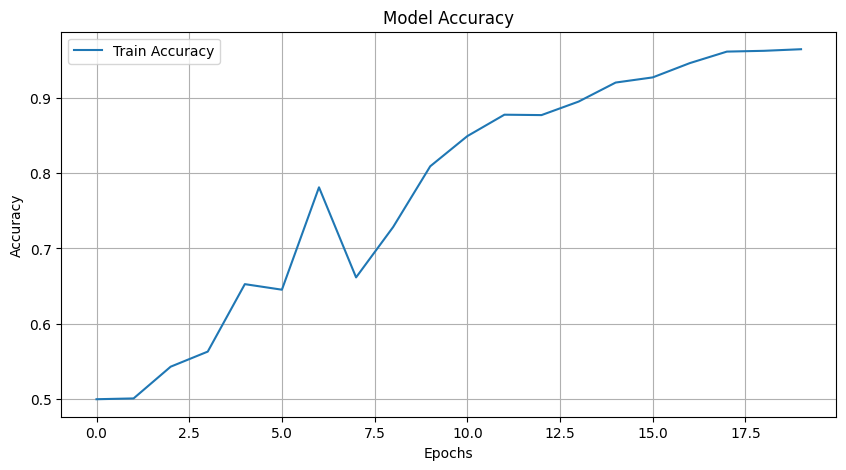

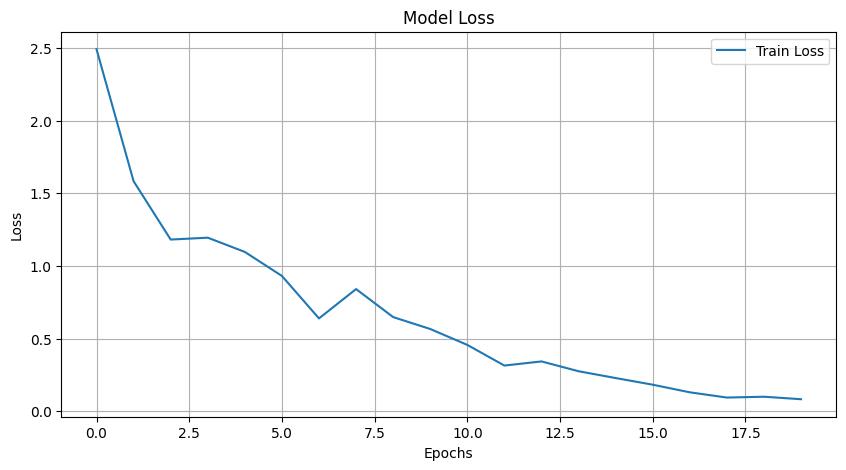

In [44]:
import matplotlib.pyplot as plt

# Assuming you saved the history when training:
# hist = model.fit(...)

# Plot Accuracy
plt.figure(figsize=(10,5))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in hist.history:
    plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Loss
plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'], label='Train Loss')
if 'val_loss' in hist.history:
    plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [35]:
import cv2
import numpy as np

def preprocess_image(img_path, img_size=224):
    img = cv2.imread(img_path)              # Load image (BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Convert to RGB
    img = cv2.resize(img, (img_size, img_size)) # Resize
    img = img.astype("float32") / 255.0     # Normalize
    img = np.expand_dims(img, axis=0)       # (1,224,224,3)
    return img


In [42]:
test_img=preprocess_image("/content/drive/MyDrive/processed_faces_final/real/033_face_10.jpg")

test_prediction=model.predict(test_img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [43]:
print(test_prediction)

[[9.992169e-01 7.831014e-04]]


In [45]:
model.save("deepfake_CNN_model.h5")


In [46]:
from google.colab import files
files.download("deepfake_CNN_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>